# Private Multiplicative Weights for Histograms

In [1]:
include("../src/PrivateMultiplicativeWeights.jl")
#Pkg.add("PrivateMultiplicativeWeights")

PrivateMultiplicativeWeights

In [2]:
using PrivateMultiplicativeWeights
using Distributions
using PyPlot

# Example: Approximating a mixture of two Gaussians.

We start from a continuous mixture of two Gaussians

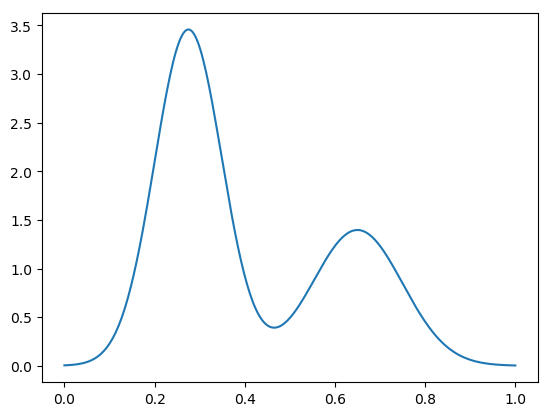

In [3]:
d_continuous = Truncated(MixtureModel(Normal, [(.275, .075), (.65, .1)], [0.65, 0.35]), 0, 1)
xs = linspace(d_continuous.lower, d_continuous.upper, 300)
ys = pdf.(d_continuous, xs)
plot(xs, ys);

create the histogram of the gaussians

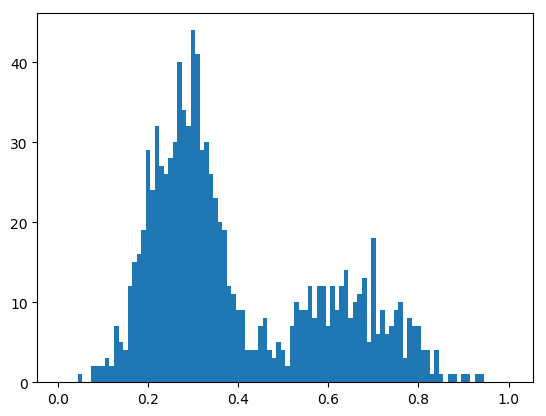

In [4]:
num_samples = 1000
domain_size = 100
samples = rand(d_continuous, num_samples)

function histogram_from_sample(samples, num_bins)
    @assert 0 <= minimum(samples)
    @assert maximum(samples) <= 1
    h = zeros(num_bins)
    for x in round.(Int64, samples*num_bins)
        h[x] += 1
    end
    collect(1:num_bins)/num_bins, h
end

xs, ys = histogram_from_sample(samples, domain_size)
bar(xs, ys, width=1/domain_size);

# Experiments

run MWEM on the histogram with all range queries possible of the kind: I=[1:i],  1 <= i <= N (N = domain size)

run MWEM with epilon = 0.1 and T = 8 (number of iterations)

In [5]:
mw = mwem(RangeQueries(domain_size), Histogram(ys/sum(ys), num_samples), MWParameters(epsilon=110, iterations=100));

compare the real historam with the synthetic one (real = blue, synthetic = red)

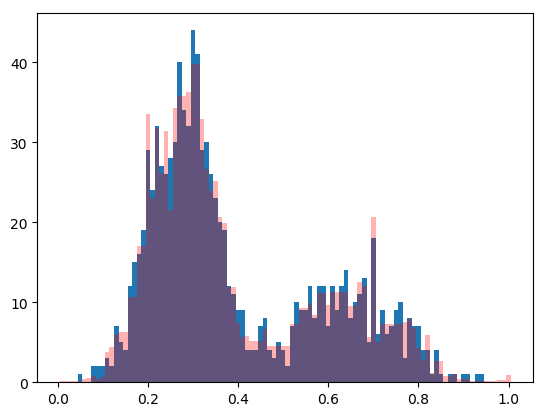

In [6]:
bar(xs, ys, 1/domain_size);
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

run MWEM with epilon = 0.1 and T = 8 (number of iterations)

In [31]:
mw = mwem(RangeQueries(domain_size), Histogram(ys/sum(ys), domain_size), MWParameters(epsilon=2000, iterations=100));
sum(ys)

1000.0

compare the real historam with the synthetic one (real = blue, synthetic = red)

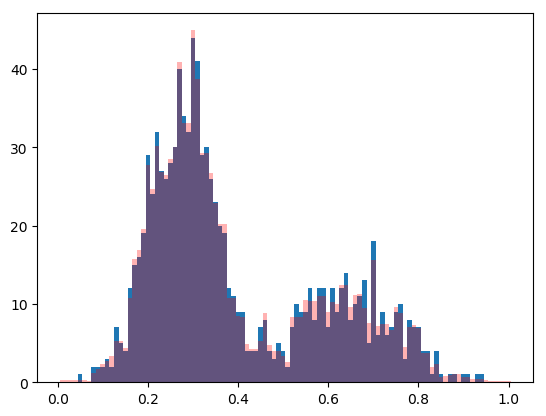

100-element Array{Float64,1}:
 0.000234842
 0.000234842
 0.000234842
 0.000234842
 0.00030119 
 0.000291438
 0.000222692
 0.00117759 
 0.00163987 
 0.00233068 
 0.00268322 
 0.00337065 
 0.00531287 
 ⋮          
 0.00102103 
 0.000675667
 0.000675667
 0.000466406
 0.00044548 
 0.00044548 
 0.000230515
 0.00010987 
 0.00017216 
 0.000125644
 0.000122396
 0.000122396

In [32]:
bar(xs, ys, 1/domain_size);
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);
mw.synthetic.weights

# Range Query Initialiation

the initialization of the range query in the implementation is as follow:
for one query of the range i, the initialization is the vector : 
    [1, 1, 1, 1, ..., 1, -1, -1,, ..., -1] (n-i times -1, after i times 1)

for all the queries the initialization not happens. just the result vector of 
    all the counts (for m queries , the result is a vector with m entries).
    the result vector fot all the queries for histogram with weights vector w (with N entries) defined by the following way:
        result =  [-1+2*w[1], -1+2*w[1]+2*w[2], ..., -1+2*w[1]+2*w[2]+...+2*w[N]]